In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

C:\Users\hp\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  % (host, default, e), RuntimeWarning)


In [2]:
train = pd.read_csv('Train_maskedv2.csv')
test = pd.read_csv('Test_maskedv2.csv')
submissions = pd.read_csv('samplesubmissionv2.csv')
vd = pd.read_csv('variable_descriptions_v2.csv')

In [1]:
!pip install lightgbm

  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)


In [2]:
import lightgbm

In [8]:
testcols = test.columns
print(len(testcols))
print(testcols)

49
Index(['ward', 'total_households', 'total_individuals', 'dw_00', 'dw_01',
       'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00',
       'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',
       'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12',
       'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'lgt_00'],
      dtype='object')


In [9]:
print(train.dtypes)

ward                     object
total_households        float64
total_individuals       float64
target_pct_vunerable    float64
dw_00                   float64
dw_01                   float64
dw_02                   float64
dw_03                   float64
dw_04                   float64
dw_05                   float64
dw_06                   float64
dw_07                   float64
dw_08                   float64
dw_09                   float64
dw_10                   float64
dw_11                   float64
dw_12                     int64
dw_13                     int64
psa_00                  float64
psa_01                  float64
psa_02                  float64
psa_03                  float64
psa_04                  float64
stv_00                  float64
stv_01                  float64
car_00                  float64
car_01                  float64
lln_00                  float64
lln_01                  float64
lan_00                  float64
lan_01                  float64
lan_02  

In [389]:
Labels = np.array(train['target_pct_vunerable'])
print(Labels)

[1.73980135 1.99338128 0.03834043 ... 0.95882823 1.02493356 5.28312496]


In [14]:
Labels.std()

12.845167991186841

In [12]:
Labels.max()

100.0

In [13]:
Labels.min()

0.0

In [22]:
train.head()

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,9D9BEUB,13569.97801,39024.03083,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,...,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,RERH3XM,13593.88256,32879.94646,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,...,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,GJWA3BO,2698.30050,8261.71093,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,...,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,...,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,...,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964


In [397]:
train = train.drop(['ward'], axis = 1)
test = test.drop(['ward'], axis = 1)

KeyError: "['ward'] not found in axis"

In [341]:
train.shape

(3174, 41)

In [375]:
train = train.drop(['target_pct_vunerable'], axis = 1)

In [358]:
Features = np.array(train)
test_enc = np.array(test)

In [359]:
test_enc.shape

(1102, 42)

In [360]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Features[:, :2])
Features[:, :2] = scaler.transform(Features[:, :2])
print(Features[:, :2])

[[ 3.25349424  2.85925741]
 [ 3.2611637   2.1992301 ]
 [-0.23453747 -0.44538003]
 ...
 [ 0.93342628  1.8316802 ]
 [ 3.1076322   3.35482504]
 [ 0.25944328  0.27111737]]


In [361]:
scaler1 = preprocessing.StandardScaler().fit(test_enc[:, :2])
test_enc[:, :2] = scaler1.transform(test_enc[:, :2])
print(test_enc[:, :2])

[[-0.16503446 -0.35938299]
 [-0.42163757 -0.42024847]
 [-0.46203328 -0.6051864 ]
 ...
 [ 0.32568337  0.19777147]
 [-0.32950555 -0.10753076]
 [-0.38886785 -0.5674457 ]]


In [362]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [363]:
indx1 = range(x_train.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.2)
x_train1 = x_train[indx1[0],:]
y_train1 = np.ravel(y_train[indx1[0]])
x_train_val = x_train[indx1[1],:]
y_train_val = np.ravel(y_train[indx1[1]])

In [364]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, max_depth=10, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [365]:
rf_pred = rf.predict(x_test)

In [366]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [367]:
mean_squared_error(rf_pred, y_test) ** 0.5

6.743862986511016

In [368]:
preds = rf.predict(test_enc)

In [387]:
x_train.shape

(2539, 42)

In [402]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 2000, seed = 123, max_depth = 10,
                           learning_rate=0.01, booster = 'dart', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_test, y_test)]
xg_reg.fit(x_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-rmse:15.88080
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:15.75895
[2]	validation_0-rmse:15.63597
[3]	validation_0-rmse:15.51073
[4]	validation_0-rmse:15.39489
[5]	validation_0-rmse:15.27555
[6]	validation_0-rmse:15.15425
[7]	validation_0-rmse:15.03144
[8]	validation_0-rmse:14.91495
[9]	validation_0-rmse:14.79880
[10]	validation_0-rmse:14.68371
[11]	validation_0-rmse:14.56744
[12]	validation_0-rmse:14.46285
[13]	validation_0-rmse:14.35241
[14]	validation_0-rmse:14.24400
[15]	validation_0-rmse:14.13796
[16]	validation_0-rmse:14.03764
[17]	validation_0-rmse:13.92490
[18]	validation_0-rmse:13.82211
[19]	validation_0-rmse:13.71992
[20]	validation_0-rmse:13.62060
[21]	validation_0-rmse:13.52688
[22]	validation_0-rmse:13.42228
[23]	validation_0-rmse:13.32465
[24]	validation_0-rmse:13.23720
[25]	validation_0-rmse:13.13919
[26]	validation_0-rmse:13.05013
[27]	validation_0-rmse:12.95958
[28]	validation_0-rmse:12.87097
[29]	validation_

[256]	validation_0-rmse:6.83584
[257]	validation_0-rmse:6.83317
[258]	validation_0-rmse:6.83107
[259]	validation_0-rmse:6.82744
[260]	validation_0-rmse:6.82399
[261]	validation_0-rmse:6.82287
[262]	validation_0-rmse:6.82110
[263]	validation_0-rmse:6.81839
[264]	validation_0-rmse:6.81624
[265]	validation_0-rmse:6.81502
[266]	validation_0-rmse:6.81283
[267]	validation_0-rmse:6.81019
[268]	validation_0-rmse:6.80781
[269]	validation_0-rmse:6.80516
[270]	validation_0-rmse:6.80285
[271]	validation_0-rmse:6.80099
[272]	validation_0-rmse:6.79906
[273]	validation_0-rmse:6.79674
[274]	validation_0-rmse:6.79509
[275]	validation_0-rmse:6.79223
[276]	validation_0-rmse:6.78929
[277]	validation_0-rmse:6.78880
[278]	validation_0-rmse:6.78649
[279]	validation_0-rmse:6.78413
[280]	validation_0-rmse:6.78224
[281]	validation_0-rmse:6.78019
[282]	validation_0-rmse:6.77789
[283]	validation_0-rmse:6.77751
[284]	validation_0-rmse:6.77543
[285]	validation_0-rmse:6.77401
[286]	validation_0-rmse:6.77181
[287]	va

[513]	validation_0-rmse:6.65020
[514]	validation_0-rmse:6.65008
[515]	validation_0-rmse:6.65004
[516]	validation_0-rmse:6.64997
[517]	validation_0-rmse:6.64989
[518]	validation_0-rmse:6.64973
[519]	validation_0-rmse:6.64976
[520]	validation_0-rmse:6.65017
[521]	validation_0-rmse:6.65013
[522]	validation_0-rmse:6.64988
[523]	validation_0-rmse:6.64980
[524]	validation_0-rmse:6.64992
[525]	validation_0-rmse:6.65001
[526]	validation_0-rmse:6.64971
[527]	validation_0-rmse:6.64974
[528]	validation_0-rmse:6.64955
[529]	validation_0-rmse:6.64958
[530]	validation_0-rmse:6.64954
[531]	validation_0-rmse:6.64958
[532]	validation_0-rmse:6.64954
[533]	validation_0-rmse:6.64946
[534]	validation_0-rmse:6.64915
[535]	validation_0-rmse:6.64947
[536]	validation_0-rmse:6.64966
[537]	validation_0-rmse:6.64938
[538]	validation_0-rmse:6.64924
[539]	validation_0-rmse:6.64898
[540]	validation_0-rmse:6.64889
[541]	validation_0-rmse:6.64872
[542]	validation_0-rmse:6.64851
[543]	validation_0-rmse:6.64836
[544]	va

[770]	validation_0-rmse:6.63777
[771]	validation_0-rmse:6.63777
[772]	validation_0-rmse:6.63774
[773]	validation_0-rmse:6.63776
[774]	validation_0-rmse:6.63781
[775]	validation_0-rmse:6.63779
[776]	validation_0-rmse:6.63781
[777]	validation_0-rmse:6.63775
[778]	validation_0-rmse:6.63780
[779]	validation_0-rmse:6.63766
[780]	validation_0-rmse:6.63761
[781]	validation_0-rmse:6.63762
[782]	validation_0-rmse:6.63757
[783]	validation_0-rmse:6.63762
[784]	validation_0-rmse:6.63759
[785]	validation_0-rmse:6.63756
[786]	validation_0-rmse:6.63753
[787]	validation_0-rmse:6.63754
[788]	validation_0-rmse:6.63748
[789]	validation_0-rmse:6.63746
[790]	validation_0-rmse:6.63749
[791]	validation_0-rmse:6.63749
[792]	validation_0-rmse:6.63751
[793]	validation_0-rmse:6.63750
[794]	validation_0-rmse:6.63757
[795]	validation_0-rmse:6.63753
[796]	validation_0-rmse:6.63751
[797]	validation_0-rmse:6.63754
[798]	validation_0-rmse:6.63752
[799]	validation_0-rmse:6.63752
[800]	validation_0-rmse:6.63746
[801]	va

[1026]	validation_0-rmse:6.63422
[1027]	validation_0-rmse:6.63419
[1028]	validation_0-rmse:6.63420
[1029]	validation_0-rmse:6.63422
[1030]	validation_0-rmse:6.63420
[1031]	validation_0-rmse:6.63420
[1032]	validation_0-rmse:6.63417
[1033]	validation_0-rmse:6.63414
[1034]	validation_0-rmse:6.63418
[1035]	validation_0-rmse:6.63418
[1036]	validation_0-rmse:6.63423
[1037]	validation_0-rmse:6.63422
[1038]	validation_0-rmse:6.63421
[1039]	validation_0-rmse:6.63422
[1040]	validation_0-rmse:6.63422
[1041]	validation_0-rmse:6.63423
[1042]	validation_0-rmse:6.63424
[1043]	validation_0-rmse:6.63423
[1044]	validation_0-rmse:6.63424
[1045]	validation_0-rmse:6.63424
[1046]	validation_0-rmse:6.63424
[1047]	validation_0-rmse:6.63426
[1048]	validation_0-rmse:6.63425
[1049]	validation_0-rmse:6.63427
[1050]	validation_0-rmse:6.63425
[1051]	validation_0-rmse:6.63424
[1052]	validation_0-rmse:6.63423
[1053]	validation_0-rmse:6.63420
[1054]	validation_0-rmse:6.63420
[1055]	validation_0-rmse:6.63420
[1056]	val

[1275]	validation_0-rmse:6.63371
[1276]	validation_0-rmse:6.63372
[1277]	validation_0-rmse:6.63371
[1278]	validation_0-rmse:6.63371
[1279]	validation_0-rmse:6.63371
[1280]	validation_0-rmse:6.63372
[1281]	validation_0-rmse:6.63372
[1282]	validation_0-rmse:6.63372
[1283]	validation_0-rmse:6.63371
[1284]	validation_0-rmse:6.63370
[1285]	validation_0-rmse:6.63371
[1286]	validation_0-rmse:6.63370
[1287]	validation_0-rmse:6.63370
[1288]	validation_0-rmse:6.63371
[1289]	validation_0-rmse:6.63371
[1290]	validation_0-rmse:6.63372
[1291]	validation_0-rmse:6.63371
[1292]	validation_0-rmse:6.63370
[1293]	validation_0-rmse:6.63371
[1294]	validation_0-rmse:6.63370
[1295]	validation_0-rmse:6.63369
[1296]	validation_0-rmse:6.63367
[1297]	validation_0-rmse:6.63366
[1298]	validation_0-rmse:6.63365
[1299]	validation_0-rmse:6.63365
[1300]	validation_0-rmse:6.63363
[1301]	validation_0-rmse:6.63363
[1302]	validation_0-rmse:6.63363
[1303]	validation_0-rmse:6.63362
[1304]	validation_0-rmse:6.63361
[1305]	val

[1524]	validation_0-rmse:6.63347
[1525]	validation_0-rmse:6.63347
[1526]	validation_0-rmse:6.63347
[1527]	validation_0-rmse:6.63347
[1528]	validation_0-rmse:6.63347
[1529]	validation_0-rmse:6.63347
[1530]	validation_0-rmse:6.63347
[1531]	validation_0-rmse:6.63347
[1532]	validation_0-rmse:6.63347
[1533]	validation_0-rmse:6.63347
[1534]	validation_0-rmse:6.63348
[1535]	validation_0-rmse:6.63348
[1536]	validation_0-rmse:6.63348
[1537]	validation_0-rmse:6.63347
[1538]	validation_0-rmse:6.63348
[1539]	validation_0-rmse:6.63347
[1540]	validation_0-rmse:6.63346
[1541]	validation_0-rmse:6.63345
[1542]	validation_0-rmse:6.63345
[1543]	validation_0-rmse:6.63345
[1544]	validation_0-rmse:6.63344
[1545]	validation_0-rmse:6.63344
[1546]	validation_0-rmse:6.63345
[1547]	validation_0-rmse:6.63345
[1548]	validation_0-rmse:6.63345
[1549]	validation_0-rmse:6.63346
[1550]	validation_0-rmse:6.63345
[1551]	validation_0-rmse:6.63346
[1552]	validation_0-rmse:6.63346
[1553]	validation_0-rmse:6.63346
[1554]	val

XGBRegressor(base_score=0.7, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=2000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=123, reg_alpha=0,
       reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [403]:
xg_pred = xg_reg.predict(x_test)

In [404]:
mean_squared_error(xg_pred, y_test) ** 0.5

6.633445215004875

In [405]:
preds = xg_reg.predict(test_enc)
submissions.target_pct_vunerable = preds
submissions.to_csv('SouthAfricaCovid1.csv', index=False)

In [384]:
import pickle
filename = 'xg_reg.sav'
pickle.dump(xg_reg, open(filename, 'wb'))

In [386]:
filename1 = 'rf.sav'
pickle.dump(rf, open(filename1, 'wb'))

#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)

In [399]:
test.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,2514.04172,8037.06199,0.671962,0.061074,0.101516,0.006891,0.021287,0.015615,0.035974,0.010995,...,0.000146,0.000420,0.011485,0.063705,0.979272,0.009926,0.003224,0.002697,0.004882,0.521007
1,1829.71944,7494.86917,0.542857,0.390850,0.039623,0.000000,0.000000,0.000000,0.002633,0.005074,...,0.000160,0.000000,0.000160,0.000000,0.998938,0.000296,0.000301,0.000305,0.000160,0.693716
2,1721.99009,5847.43254,0.968071,0.003525,0.001431,0.000000,0.000000,0.000000,0.018546,0.004769,...,0.002075,0.000631,0.006504,0.000171,0.955895,0.012170,0.000000,0.030012,0.001923,0.933954
3,12388.02257,52211.66859,0.397274,0.004734,0.001068,0.000279,0.000799,0.197760,0.005227,0.065487,...,0.000505,0.000593,0.008330,0.000000,0.293629,0.694779,0.003238,0.000628,0.007726,0.921470
4,1754.25716,4266.57609,0.815197,0.016697,0.078571,0.008975,0.047882,0.015398,0.007264,0.000000,...,0.000000,0.000234,0.016846,0.178598,0.110861,0.054114,0.006062,0.823495,0.005470,0.996227


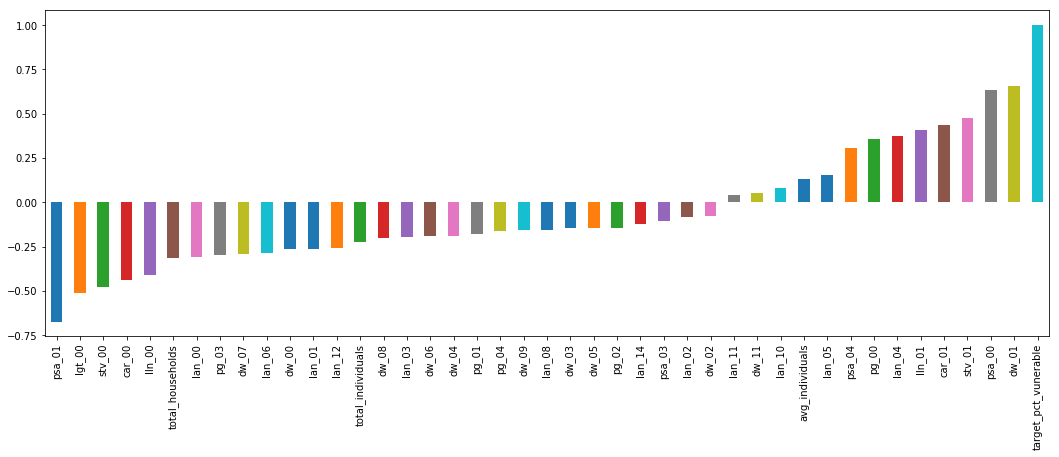

In [401]:
# Look at correlation with target
train.corr()['target_pct_vunerable'].sort_values().plot(kind='bar', figsize=(18, 6))

In [391]:
#excluded_cols = ['dw_03', 'dw_05', 'pg_02', 'lan_14', 'psa_03', 'lan_02', 'dw_02', 'dw_10', 
               # 'psa_02', 'lan_07', 'lan_09', 'lan_11', 'dw_11', 'lan_10']
    
excluded_cols = ['dw_12', 'dw_13', 'lan_13', 'dw_10', 'psa_02', 'lan_07', 'lan_09']

In [392]:
new_cols = []
for i in cols:
    if i not in excluded_cols:
        new_cols.append(i)
    
    
print(new_cols)

['ward', 'total_households', 'total_individuals', 'target_pct_vunerable', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_11', 'psa_00', 'psa_01', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_08', 'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00']


43


In [395]:
for i in excluded_cols:
    test = test.drop(i, axis=1)

In [284]:
Labels = np.array(train['target_pct_vunerable'])
print(Labels)

[1.73980135 1.99338128 0.03834043 ... 0.95882823 1.02493356 5.28312496]


In [285]:
train = train.drop(['target_pct_vunerable'], axis=1)

In [396]:
print(train.shape)
print(test.shape)

(3174, 42)
(1102, 41)


In [347]:
train.describe()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
count,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,...,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000
mean,3429.319013,12407.679534,0.710593,0.097372,0.031894,0.005820,0.008202,0.006047,0.022225,0.038319,...,0.025812,0.050327,0.012342,0.014335,0.863095,0.041924,0.017665,0.073692,0.003624,0.830599
std,3117.342795,9310.300318,0.217458,0.188484,0.078634,0.018592,0.029408,0.023772,0.036762,0.057300,...,0.132935,0.153493,0.020594,0.041155,0.248096,0.146524,0.074607,0.169049,0.010378,0.208129
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692
25%,1668.367500,6972.024960,0.591480,0.002919,0.002421,0.000000,0.000000,0.000000,0.002676,0.004586,...,0.000303,0.000453,0.002477,0.000000,0.879603,0.000960,0.000848,0.000445,0.000633,0.788085
50%,2263.921720,9217.504670,0.766925,0.010649,0.005792,0.000803,0.000603,0.000813,0.008408,0.015730,...,0.001195,0.003092,0.006266,0.000097,0.989811,0.003088,0.001753,0.001206,0.001630,0.909446
75%,3681.155303,13463.543668,0.885571,0.074650,0.028085,0.002538,0.002145,0.002921,0.025111,0.046804,...,0.004992,0.028330,0.013430,0.011548,0.995798,0.012419,0.004636,0.039255,0.004025,0.963780
max,39595.195110,91716.746370,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,0.455815,...,0.985258,0.991674,0.367785,0.998448,1.000000,0.969519,0.939564,0.940563,0.367842,1.000000


In [400]:
train['avg_individuals'] = train['total_individuals'] / train['total_households']
test['avg_individuals'] = test['total_individuals'] / test['total_households']

In [354]:
test.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,avg_individuals
0,2514.04172,8037.06199,0.671962,0.061074,0.101516,0.006891,0.021287,0.015615,0.035974,0.010995,...,0.000420,0.011485,0.063705,0.979272,0.009926,0.003224,0.002697,0.004882,0.521007,3.196869
1,1829.71944,7494.86917,0.542857,0.390850,0.039623,0.000000,0.000000,0.000000,0.002633,0.005074,...,0.000000,0.000160,0.000000,0.998938,0.000296,0.000301,0.000305,0.000160,0.693716,4.096185
2,1721.99009,5847.43254,0.968071,0.003525,0.001431,0.000000,0.000000,0.000000,0.018546,0.004769,...,0.000631,0.006504,0.000171,0.955895,0.012170,0.000000,0.030012,0.001923,0.933954,3.395741
3,12388.02257,52211.66859,0.397274,0.004734,0.001068,0.000279,0.000799,0.197760,0.005227,0.065487,...,0.000593,0.008330,0.000000,0.293629,0.694779,0.003238,0.000628,0.007726,0.921470,4.214689
4,1754.25716,4266.57609,0.815197,0.016697,0.078571,0.008975,0.047882,0.015398,0.007264,0.000000,...,0.000234,0.016846,0.178598,0.110861,0.054114,0.006062,0.823495,0.005470,0.996227,2.432127
